In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('training_set_VU_DM.csv')

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,27,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,26,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,21,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,34,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,4,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [35]:
# Get the count, number of unique values, and value counts (including missing values) for each column
counts = pd.DataFrame({'count': df.count(), 'unique': df.nunique(), 'missing': df.isnull().sum()})

# Print the result
counts

,count,unique,missing
srch_id,4958347,199795,0
date_time,4958347,198615,0
site_id,4958347,34,0
visitor_location_country_id,4958347,210,0
visitor_hist_starrating,251866,312,4706481
visitor_hist_adr_usd,252988,7799,4705359
prop_country_id,4958347,172,0
prop_id,4958347,129113,0
prop_starrating,4958347,6,0
prop_review_score,4950983,10,7364


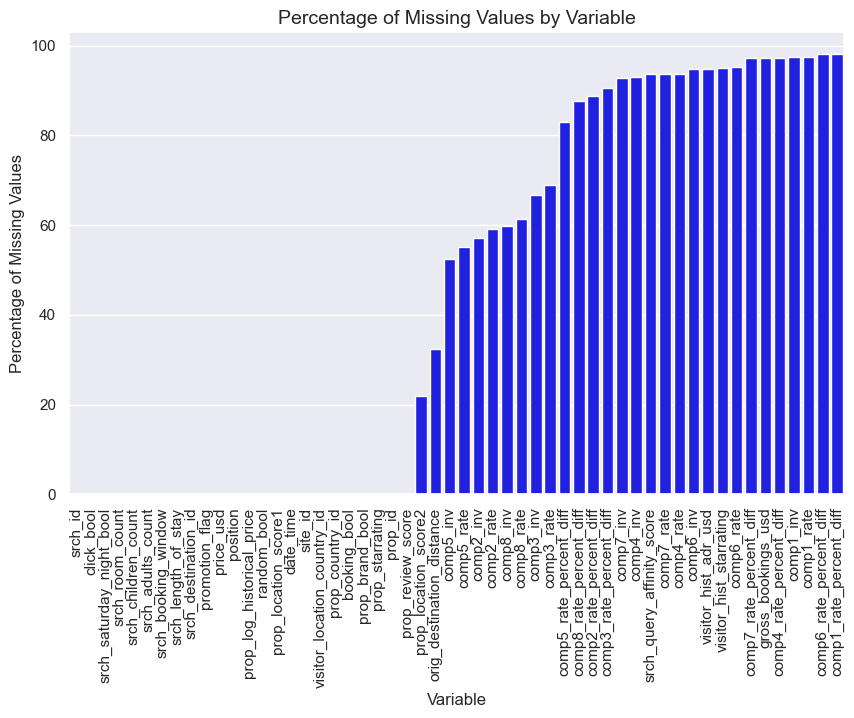

In [36]:
# Calculate the percentage of missing values for each variable
missing_percentage = df.isna().mean() * 100
# Reset the index of the resulting series
missing_percentage = missing_percentage.reset_index()
# Rename the columns of the resulting dataframe
missing_percentage.columns = ['variable', 'missing_percentage']
# Sort the missing_percentage dataframe by the missing_percentage column
missing_percentage = missing_percentage.sort_values('missing_percentage')

# Create the bar chart using Seaborn's barplot() function
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='variable', y='missing_percentage', data=missing_percentage, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Percentage of Missing Values', fontsize=12)
plt.title('Percentage of Missing Values by Variable', fontsize=14)

# Display the plot
plt.show()

In [ ]:
# Count the occupied cells
sparsity_count = df.isnull().values.sum()

# Count all cells
full_count = df.size

# Find the sparsity of the DataFrame
sparsity = sparsity_count / full_count
sparsity # percentage of filled cells in the matrix

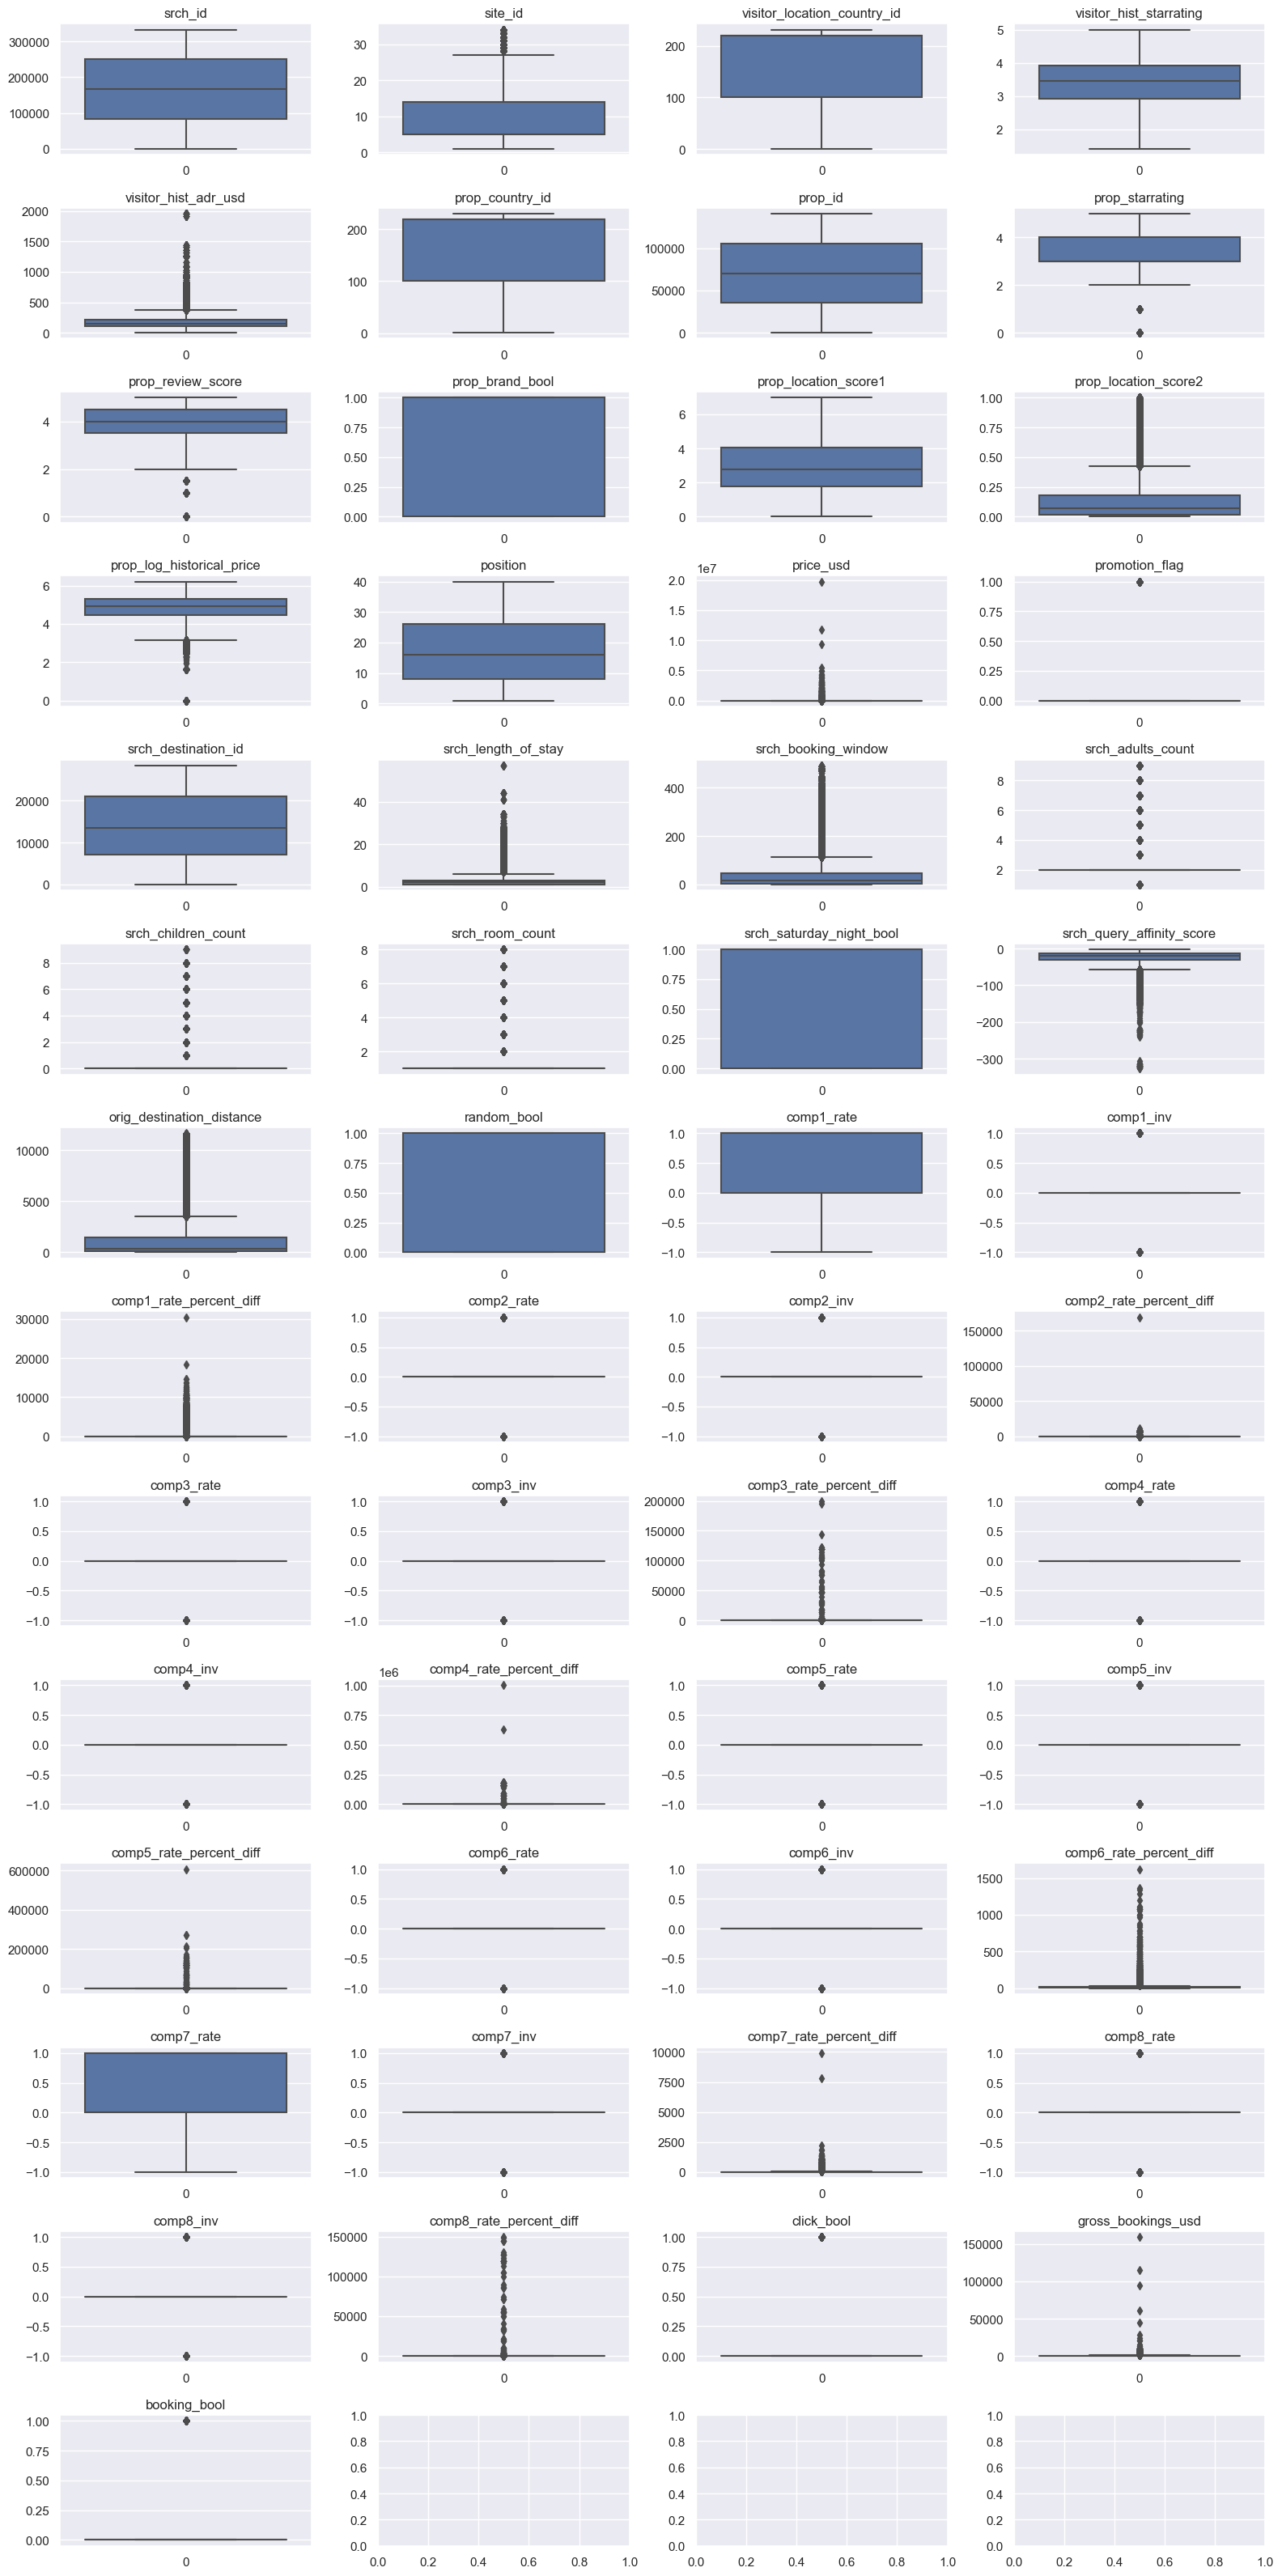

In [37]:
# Set up the subplots
fig, axes = plt.subplots(nrows=14, ncols=4, figsize=(16, 32))
axes = axes.flatten()

# Select only columns of type float or integer
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(ax=axes[i], data=df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

<AxesSubplot:>

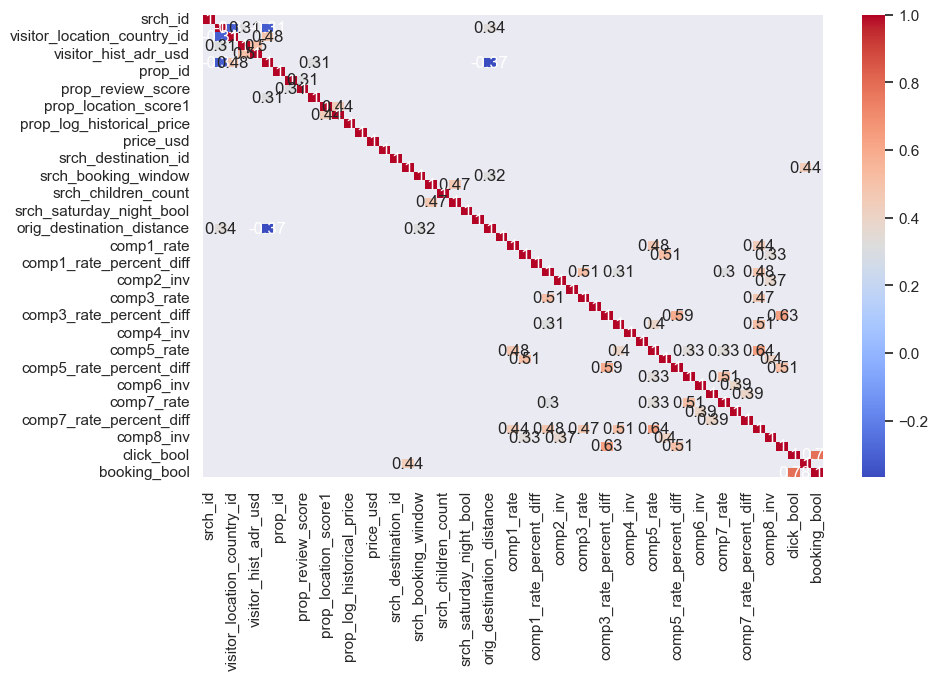

In [44]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# Create a correlation matrix
corr = df[numeric_cols].corr()

# Set the threshold for correlation coefficient
threshold = 0.3
# Filter out the correlations below the threshold
corr_high = corr[(corr > threshold) | (corr < -threshold)]
# Plot the correlation matrix
sns.heatmap(corr_high, cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'Time Series of room price by date time of search')

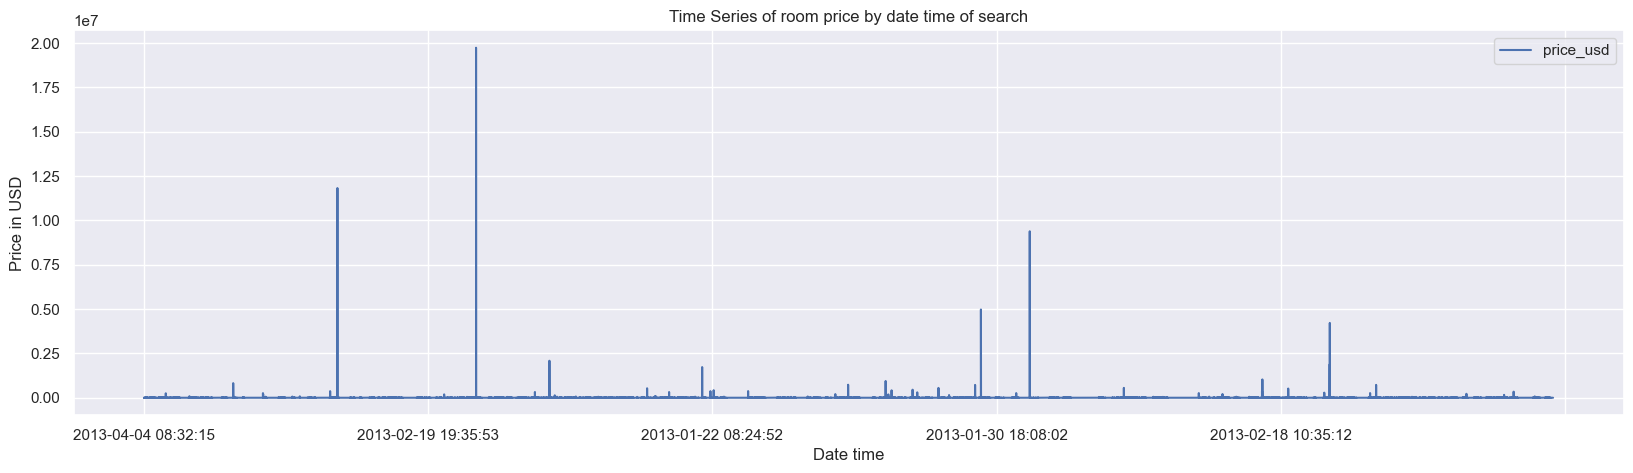

In [39]:
df.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')